# K-means Clustering

## Clustering su dataset generati artificialmente

In [23]:
#Crea dei datasets sintetici generati artificialmente, campionando a gruppi da una distribuzione pseudo-normale
from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, centers=4, random_state=random_state)

In [24]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=4, max_iter=500, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

[[-8.92121685 -5.44840113]
 [-4.60405329 -0.02613257]
 [ 1.99922786  0.46076078]
 [ 4.77299036 -9.7489611 ]]


Text(0.5, 1.0, 'k-means clusters=4')

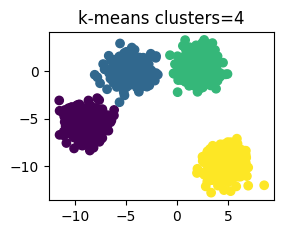

In [25]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("k-means clusters=4")

In [26]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_pred)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_pred)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.759335349300705


## Clustering su dataset reali

In [2]:
import pandas as pd

path = '../datasets/heart_failure_clinical_records_dataset.csv'
dataset = pd.read_csv(path)

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [3]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Data preprocessing

In [30]:
import numpy as np

# Data preprocessing for category family
target = dataset['DEATH_EVENT']
y = np.asarray(target)
X = dataset.iloc[:, [0, 6]].values

## Training the KNN Classifier model

In [31]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=4, max_iter=500, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


[[6.14673235e+01 2.22941176e+05]
 [6.07777778e+01 1.32824444e+05]
 [6.10574828e+01 4.66517241e+05]
 [6.02764228e+01 2.96731307e+05]]


In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.48018475549315687


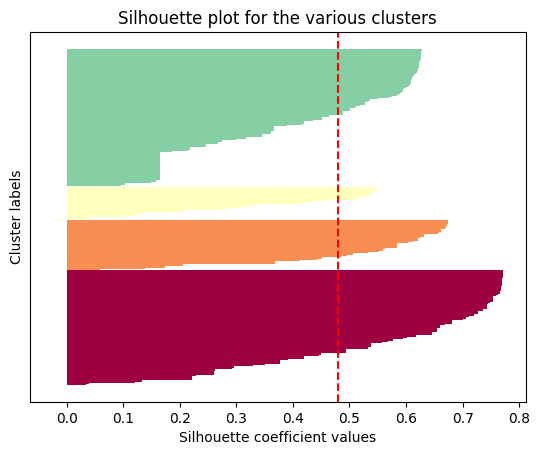

In [33]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 4
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

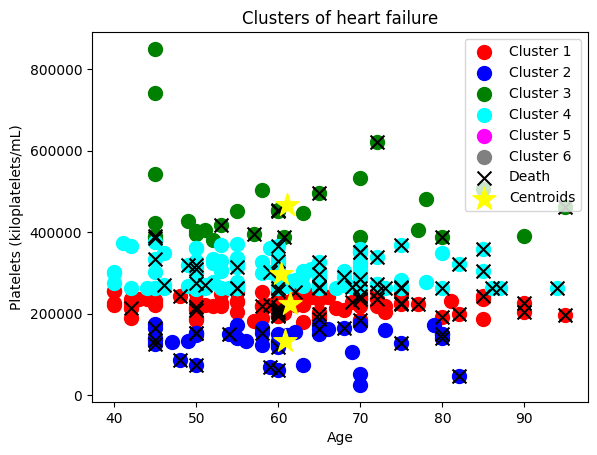

In [34]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'grey', label = 'Cluster 6')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='black', marker='x', label='Death')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Clusters of heart failure')
plt.xlabel('Age')
plt.ylabel('Platelets (kiloplatelets/mL)')
plt.legend()
plt.show()

In [5]:
import numpy as np

# Data preprocessing for category family
target = dataset['DEATH_EVENT']
y = np.asarray(target)
X = dataset.iloc[:, [11, 6]].values

print(X)

[[4.0000000e+00 2.6500000e+05]
 [6.0000000e+00 2.6335803e+05]
 [7.0000000e+00 1.6200000e+05]
 [7.0000000e+00 2.1000000e+05]
 [8.0000000e+00 3.2700000e+05]
 [8.0000000e+00 2.0400000e+05]
 [1.0000000e+01 1.2700000e+05]
 [1.0000000e+01 4.5400000e+05]
 [1.0000000e+01 2.6335803e+05]
 [1.0000000e+01 3.8800000e+05]
 [1.0000000e+01 3.6800000e+05]
 [1.0000000e+01 2.5300000e+05]
 [1.1000000e+01 1.3600000e+05]
 [1.1000000e+01 2.7600000e+05]
 [1.2000000e+01 4.2700000e+05]
 [1.3000000e+01 4.7000000e+04]
 [1.4000000e+01 2.6200000e+05]
 [1.4000000e+01 1.6600000e+05]
 [1.5000000e+01 2.3700000e+05]
 [1.5000000e+01 8.7000000e+04]
 [1.6000000e+01 2.7600000e+05]
 [2.0000000e+01 2.9700000e+05]
 [2.0000000e+01 2.8900000e+05]
 [2.2000000e+01 3.6800000e+05]
 [2.3000000e+01 2.6335803e+05]
 [2.3000000e+01 1.4900000e+05]
 [2.4000000e+01 1.9600000e+05]
 [2.6000000e+01 2.8400000e+05]
 [2.6000000e+01 1.5300000e+05]
 [2.6000000e+01 2.0000000e+05]
 [2.7000000e+01 2.6335803e+05]
 [2.8000000e+01 3.6000000e+05]
 [2.8000

In [6]:
from KMeans import KMeans

kmeans = KMeans(n_clusters=2, max_iter=500, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [7]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5584006893837427


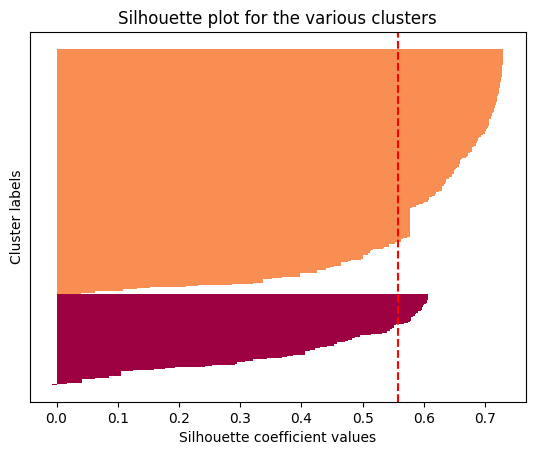

In [8]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 4
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

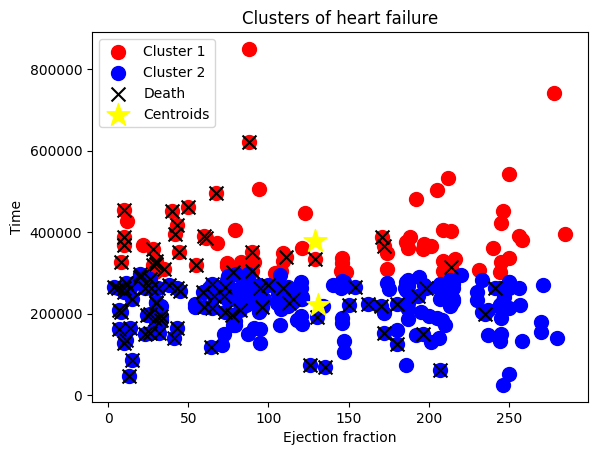

In [9]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='black', marker='x', label='Death')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s = 300, c = 'yellow', marker='*', label = 'Centroids')
plt.title('Clusters of heart failure')
plt.xlabel('Ejection fraction')
plt.ylabel('Time')
plt.legend()
plt.show()

## Comparison with Scikit-learn API

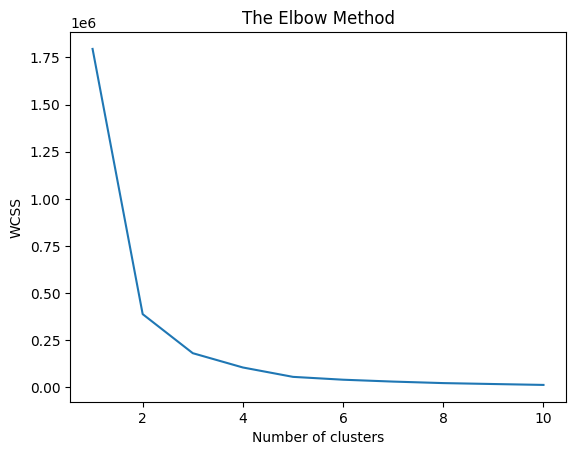

In [40]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=50, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10)
# Esegui KMeans sui dati
kmeans.fit(X)

# Ottieni le etichette dei cluster assegnate a ciascun punto
y_kmeans = kmeans.predict(X)

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcola i valori della silhouette per ciascun punto
silhouette_vals = silhouette_samples(X, y_kmeans)

# Calcola il Silhouette Score medio
silhouette_avg = silhouette_score(X, y_kmeans)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6086503209027524


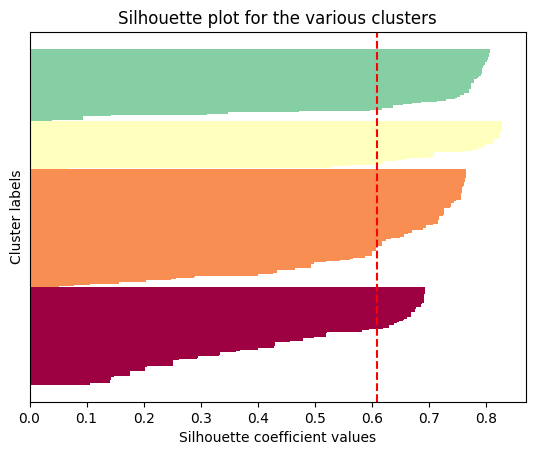

In [43]:
import matplotlib.pyplot as plt

# Plot
n_clusters = 4
fig, ax1 = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[y_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper += size_cluster_i
    color = plt.cm.Spectral(float(i) / n_clusters)
    ax1.barh(range(y_lower, y_upper), ith_cluster_silhouette_vals, height=1.0, edgecolor='none', color=color)
    y_lower += size_cluster_i

# Calcola la silhouette media
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.yticks([])
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster labels')
plt.title('Silhouette plot for the various clusters')
plt.show()

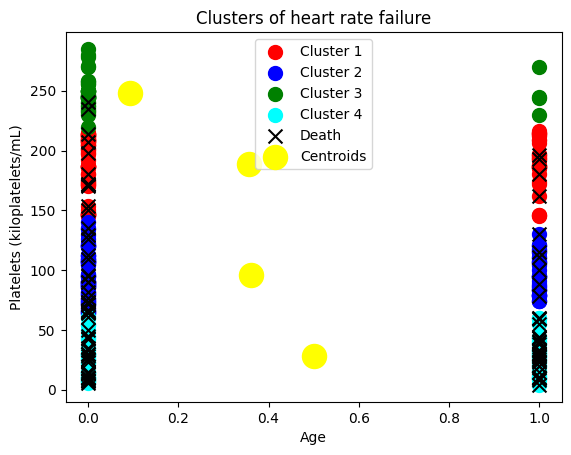

In [44]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=100, c='black', marker='x', label='Death')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of heart rate failure')
plt.xlabel('Age')
plt.ylabel('Platelets (kiloplatelets/mL)')
plt.legend()
plt.show()

## Comparison with Weka tool

![](knn_weka.png)

![](clustering_weka.png)